In [1]:
import sys
sys.path.append("../")
from tfMFs.tfCMF import tfCMF
from dataset import create_synthetic_data
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("/home/ryo_matsui/notebook/mydata/ToxicComment/jigsaw-toxic-comment-train.csv")

In [3]:
vectorizer = CountVectorizer(min_df=3, max_df=0.9, stop_words="english", binary=True)
X = vectorizer.fit_transform(df.head(10000).comment_text)
y = df.head(10000).toxic.values

In [4]:
train_data = X.A
test_data = X.A
y = y[:,np.newaxis]

In [5]:
cmf = tfCMF(y, alpha=0.7, d_hidden=10, lamda=1)
U, V, Z, train_loss_SGD, _ = cmf.train(train_data, test_data, optim_steps=600, verbose=10, early_stopping=5, lr=0.001, optimizer="SGD")

100%|██████████| 600/600 [20:45<00:00,  2.08s/it]


In [6]:
cmf = tfCMF(y, alpha=0.7, d_hidden=10, lamda=1)
U, V, Z, train_loss_Adam, _ = cmf.train(train_data, test_data, optim_steps=600, verbose=10, early_stopping=5,lr=0.001, optimizer="Adam")

100%|██████████| 600/600 [21:56<00:00,  2.19s/it]


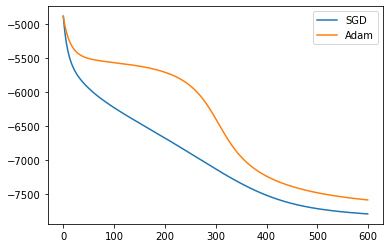

In [7]:
plt.plot(np.arange(0,600),train_loss_SGD, label="SGD")
plt.plot(np.arange(0,600),train_loss_Adam, label="Adam")
plt.legend()
plt.show()